# Importing Data:

In [176]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

In [177]:
compdata_original = pd.read_csv('comp1data.csv', header=0, na_values = '-')
compdata_original.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


# Descriptive Statistics

In [178]:
compdata_original.shape
# 682 rows and 22 columns

(682, 22)

In [179]:
compdata_original.describe(include='all')
compdata_original.median()

P(IPO)     1.350000e+01
P(H)       1.500000e+01
P(L)       1.300000e+01
P(1Day)    1.484500e+01
C1         1.070000e+02
C2         1.000000e+00
C3         1.000000e-02
C4         9.124591e-03
C5         2.740018e+07
C6         7.398704e+06
C7         1.038330e+02
T1         4.440000e+02
T2         1.204500e+04
T3         1.078500e+04
T4         2.790000e+02
T5         6.240000e+02
S1         6.000000e+01
S2         1.000000e+02
S3         1.340000e+02
dtype: float64

In [180]:
compdata_original.median()

P(IPO)     1.350000e+01
P(H)       1.500000e+01
P(L)       1.300000e+01
P(1Day)    1.484500e+01
C1         1.070000e+02
C2         1.000000e+00
C3         1.000000e-02
C4         9.124591e-03
C5         2.740018e+07
C6         7.398704e+06
C7         1.038330e+02
T1         4.440000e+02
T2         1.204500e+04
T3         1.078500e+04
T4         2.790000e+02
T5         6.240000e+02
S1         6.000000e+01
S2         1.000000e+02
S3         1.340000e+02
dtype: float64

In [181]:
# Create a copy of the data
compdata = compdata_original.copy()

# Variable Calculations

In [182]:
# Impute the rows T2 values
# Cannot do calculations with missing data on the number of words, the ratios will be 0 and create outliers

compdata.drop(compdata[compdata['T1'] == 0].index, inplace = True) 
compdata.drop(compdata[compdata['T2'] == 0].index, inplace = True) 
compdata.loc[compdata['T1'] == 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


In [183]:
compdata.loc[compdata['T2'] == 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


In [184]:
# Ratios:

    # ** How to find the ratio for T1 and T2... drop them
    # Should the other numbers be dropped? Make a new df with imputed/calculated numbers?

# Percentage of real words
compdata['T3_'] = (compdata['T3']/compdata['T2'])
# Percentage of long sentences
compdata['T4_'] = (compdata['T4']/compdata['T1'])
# Percentage of long words
compdata['T5_'] = (compdata['T5']/compdata['T2'])
# Percentage of positive words
compdata['S1_'] = (compdata['S1']/compdata['T2'])
# Percentage of negative words
compdata['S2_'] = (compdata['S2']/compdata['T2'])
# Percentage of uncertain words
compdata['S3_'] = (compdata['S3']/compdata['T2'])
compdata.head()

# Target & Control Variable Calculation

compdata['P(mid)'] = ((compdata['P(H)']+compdata['P(L)'])/2)

def p(row):
    if row['P(IPO)'] < row['P(mid)']:
        val = 1
    else:
        val = 0
    return val

def q(row):
    if row['P(1Day)'] > row['P(IPO)']:
        val = 1
    else:
        val = 0
    return val

def r(row):
    if row['C3'] >= 0:
        val = 1
    else:
        val = 0
    return val

def s(row):
    if row['P(IPO)'] > row['P(mid)']:
        val = (row['P(IPO)'] - row['P(mid)'])/row['P(mid)']*100
    else:
        val = 0
    return val

compdata['C3_'] = compdata.apply(r, axis=1)
compdata['C5_'] = compdata['C5']/compdata['C6'] 
compdata['C6_'] = compdata.apply(s, axis=1)
compdata['Y1'] = compdata.apply(p, axis=1)
compdata['Y2'] = compdata.apply(q, axis=1)

# Missing Data:

In [185]:
compdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 0 to 681
Data columns (total 34 columns):
I1         680 non-null object
I2         680 non-null object
I3         672 non-null object
P(IPO)     675 non-null float64
P(H)       670 non-null float64
P(L)       670 non-null float64
P(1Day)    658 non-null float64
C1         658 non-null float64
C2         658 non-null float64
C3         644 non-null float64
C4         658 non-null float64
C5         674 non-null float64
C6         674 non-null float64
C7         608 non-null float64
T1         679 non-null float64
T2         679 non-null float64
T3         679 non-null float64
T4         679 non-null float64
T5         679 non-null float64
S1         679 non-null float64
S2         679 non-null float64
S3         679 non-null float64
T3_        679 non-null float64
T4_        679 non-null float64
T5_        679 non-null float64
S1_        679 non-null float64
S2_        679 non-null float64
S3_        679 non-null float64
P(

In [186]:
#isinstance(compdata['I3'], object) 

#compdata['I3'] = [isinstance(x, str) for x in compdata.I3]
#compdata

#compdata[compdata.I3.apply(lambda x: isinstance(x, str))]

In [187]:
compdata.isna().sum()

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
T3_         1
T4_         1
T5_         1
S1_         1
S2_         1
S3_         1
P(mid)     10
C3_         0
C5_         6
C6_         0
Y1          0
Y2          0
dtype: int64

In [188]:
# what is the percentage of missing data in each column
compdata.isna().mean().round(4) * 100

# Majority of the data is missing from C7

I1          0.00
I2          0.00
I3          1.18
P(IPO)      0.74
P(H)        1.47
P(L)        1.47
P(1Day)     3.24
C1          3.24
C2          3.24
C3          5.29
C4          3.24
C5          0.88
C6          0.88
C7         10.59
T1          0.15
T2          0.15
T3          0.15
T4          0.15
T5          0.15
S1          0.15
S2          0.15
S3          0.15
T3_         0.15
T4_         0.15
T5_         0.15
S1_         0.15
S2_         0.15
S3_         0.15
P(mid)      1.47
C3_         0.00
C5_         0.88
C6_         0.00
Y1          0.00
Y2          0.00
dtype: float64

In [189]:
compdata[compdata["I1"]=='DLB']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
174,DLB,"Dolby Laboratories, Inc.","6794, 3861, 3663, 7819",18.0,18.0,16.0,24.299999,90.0,1.0,0.47,...,0.059655,0.004513,0.00798,0.010793,17.0,1,3.540441,5.882353,0,1


In [190]:
compdata[compdata["I1"]=='DTSI']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
187,DTSI,"DTS, INC.","3651, 6794, 7819",17.0,16.0,14.0,24.92,76.0,0.0,0.99,...,0.050882,0.005922,0.011482,0.00846,15.0,1,3.410759,13.333333,0,1


In [191]:
compdata[compdata["I1"]=='RLD']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
499,RLD,RealD Inc.,"3663, 3861, 6794",16.0,15.0,13.0,19.51,98.0,1.0,-0.33,...,0.056527,0.006539,0.00874,0.014273,14.0,0,3.81107,14.285714,0,1


In [192]:
compdata[compdata["I1"]=='UPG']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
620,UPG,UNIVERSAL POWER GROUP,"7389, 5063",7.0,9.0,7.0,7.35,101.0,0.0,0.38,...,0.04157,0.0042,0.008835,0.00956,8.0,1,1.666667,0.0,1,1


In [193]:
#compdata["I3"] = pd.to_numeric(compdata["I3"])

In [194]:
compdata.I3.replace(to_replace ="6794, 3861, 3663, 7819", value ="3000", inplace=True)

In [195]:
compdata.I3.replace(to_replace ="3651, 6794, 7819", value ="9900", inplace=True)

In [196]:
compdata.I3.replace(to_replace ="3663, 3861, 6794", value ="3000", inplace=True)

In [197]:
compdata.I3.replace(to_replace ="7389, 5063", value ="9900", inplace=True)

In [198]:
compdata.I3.replace(to_replace ="541990", value ="7000", inplace=True)

In [199]:
compdata["I3"] = pd.to_numeric(compdata["I3"])

In [200]:
def assign_I3_bins(I3):
    if I3 >= 100 and I3 <= 999:                    
        return(1)
    if I3 >= 1000 and I3 <= 1499:       
        return(2)
    if I3 >= 1500 and I3 <= 1799:       
        return(3)
    if I3 >= 1800 and I3 <= 1999:      
        return(4)
    if I3 >= 2000 and I3 <= 3999:                  
        return(5)
    if I3 >= 4000 and I3 <= 4999:                  
        return(6)
    if I3 >= 5000 and I3 <= 5199:                 
        return(7)
    if I3 >= 5200 and I3 <= 5999:                  
        return(8)
    if I3 >= 6000 and I3 <= 6799:                 
        return(9)
    if I3 >= 7000 and I3 <= 8999:                  
        return(10)
    if I3 >= 9100 and I3 <= 9729:                  
        return(11)   
    if I3 >= 9900 and I3 <= 9999:                  
        return(12)   
    
    # Creating a new column I3_bins in the dataframe

compdata['I3_bins'] = compdata['I3'].apply(assign_I3_bins)  

compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,I3_bins
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,0.004875,0.009199,0.010929,9.0,1,3.864345,11.111111,0,1,5.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,0.003258,0.011105,0.010876,9.0,0,12.028832,0.000000,1,0,5.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,0.011593,0.006271,0.011403,13.0,0,3.369134,0.000000,1,0,5.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,0.009686,0.007144,0.013319,15.0,0,3.299697,0.000000,1,1,5.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,0.004518,0.010047,0.011261,20.0,1,3.726269,5.000000,0,1,6.0


In [201]:
compdata.isna().sum()

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
T3_         1
T4_         1
T5_         1
S1_         1
S2_         1
S3_         1
P(mid)     10
C3_         0
C5_         6
C6_         0
Y1          0
Y2          0
I3_bins     8
dtype: int64

In [175]:
# Since C2 is a binary value, we will fill the missing data with the mode

compdata['Imputed_C2'] = compdata['C2'].fillna(compdata['C2'].mode()[0])
compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,I3_bins,Imputed_C2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,0.009199,0.010929,9.0,1,3.864345,11.111111,0,1,5.0,1.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,0.011105,0.010876,9.0,0,12.028832,0.000000,1,0,5.0,0.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,0.006271,0.011403,13.0,0,3.369134,0.000000,1,0,5.0,1.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,0.007144,0.013319,15.0,0,3.299697,0.000000,1,1,5.0,1.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,0.010047,0.011261,20.0,1,3.726269,5.000000,0,1,6.0,1.0


In [19]:
# Drop the columns that are missing data in the P variables

compdata.isna().sum()

I1             0
I2             0
I3             8
P(IPO)         5
P(H)          10
P(L)          10
P(1Day)       22
C1            22
C2            22
C3            36
C4            22
C5             6
C6             6
C7            72
T1             1
T2             1
T3             1
T4             1
T5             1
S1             1
S2             1
S3             1
T3_            1
T4_            1
T5_            1
S1_            1
S2_            1
S3_            1
P(mid)        10
C3_            0
C5_            6
C6_            0
Y1             0
Y2             0
Imputed_C2     0
dtype: int64

In [20]:
# Create DF with only continuous features

compdata_cont = compdata.drop(['I1','I2','I3','C2','Imputed_C2'], axis=1)
compdata_cont.head()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
0,10.0,9.5,8.5,11.870000,122.0,3.43,0.029074,40962052.0,10600000.0,51.345,...,0.054250,0.004875,0.009199,0.010929,9.0,1,3.864345,11.111111,0,1
1,8.0,10.0,8.0,7.250000,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,...,0.051395,0.003258,0.011105,0.010876,9.0,0,12.028832,0.000000,1,0
2,7.0,14.0,12.0,6.700000,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,...,0.061764,0.011593,0.006271,0.011403,13.0,0,3.369134,0.000000,1,0
3,11.5,16.0,14.0,12.390000,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,...,0.061630,0.009686,0.007144,0.013319,15.0,0,3.299697,0.000000,1,1
4,21.0,21.0,19.0,56.599998,80.0,0.07,-0.034895,30741716.0,8250000.0,632.298,...,0.048550,0.004518,0.010047,0.011261,20.0,1,3.726269,5.000000,0,1


In [21]:
# Drop missing P Values from Continues DF

compdata_cont = compdata_cont.dropna(how='all', subset=['P(1Day)'])

In [22]:
compdata_cont.isna().sum()

P(IPO)      0
P(H)        0
P(L)        0
P(1Day)     0
C1          0
C3         24
C4          0
C5          0
C6          0
C7         60
T1          0
T2          0
T3          0
T4          0
T5          0
S1          0
S2          0
S3          0
T3_         0
T4_         0
T5_         0
S1_         0
S2_         0
S3_         0
P(mid)      0
C3_         0
C5_         0
C6_         0
Y1          0
Y2          0
dtype: int64

In [23]:
# Create DF with only categorical features

compdata_cat = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_'], axis=1)
compdata_cat.head()

,I1,I2,I3,C2,C3_,Y1,Y2,Imputed_C2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,1.0,1,0,1,1.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,0.0,0,1,0,0.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,1.0,0,1,0,1.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,1.0,0,1,1,1.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,1.0,1,0,1,1.0


__Thoughts:__

- Should we just use the median to fill the continuous values?

__Replace missing values in categorical field with logistic regression predictions__

__Checking the correlations between interval variables__
- heatmap is a good way to visualize the correlation between variables
- **See metadata**
- Do we need to do metadata first?

- Use the Heatmap to determine most correlated variables
    - make scatterplots comparing the 2 variables

# Interquartile Ratio Outliers:

In [24]:
compdata.shape

(680, 35)

In [25]:
# Determine if there are any outliers in the data that will alter the results
# Use box plots for all the variables to visualize the outliers 
# Standardize first!

# only continuous

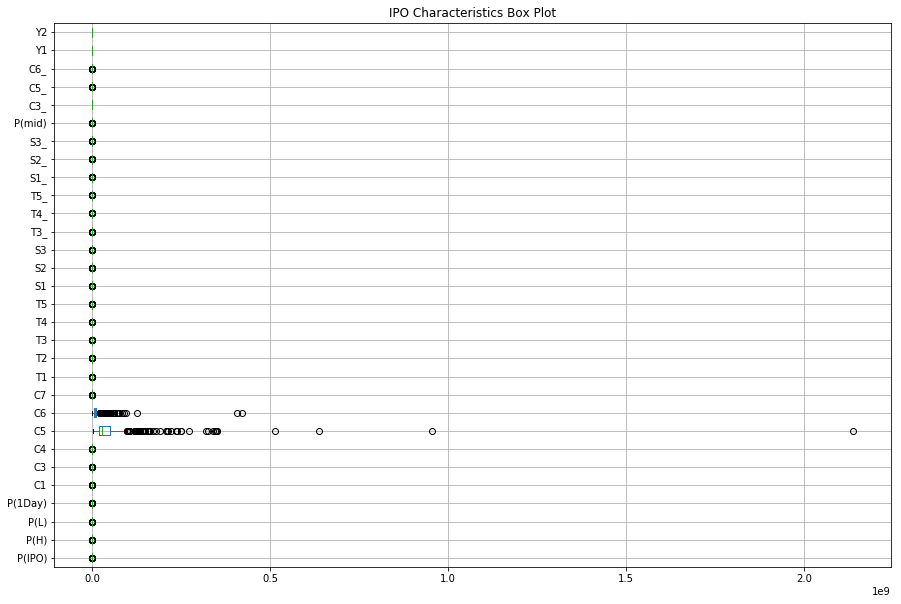

In [26]:
compdata_cont.boxplot(vert=False, figsize=(15,10))
plt.title('IPO Characteristics Box Plot')
plt.show()

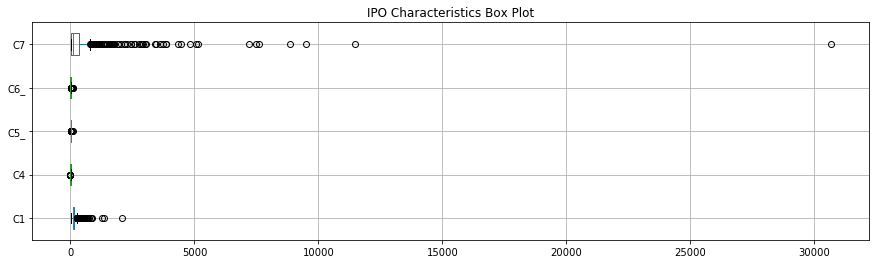

In [27]:
compdata_cont.boxplot(column=['C1','C4','C5_','C6_','C7'],vert=False, figsize=(15,4))
plt.title('IPO Characteristics Box Plot')
plt.show()

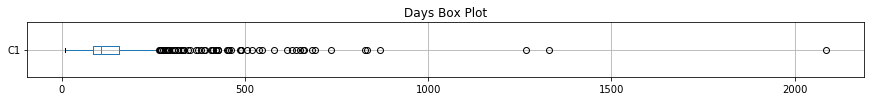

In [28]:
# In number of days

compdata_cont.boxplot(column=['C1'],vert=False, figsize=(15,1))
plt.title('Days Box Plot')
plt.show()

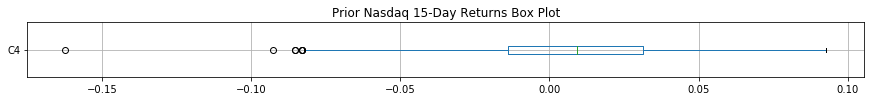

In [29]:
compdata_cont.boxplot(column='C4',vert=False, figsize=(15,1))
plt.title('Prior Nasdaq 15-Day Returns Box Plot')
plt.show()

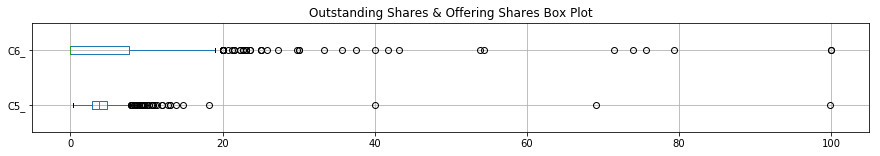

In [30]:
compdata_cont.boxplot(column=['C5_','C6_'],vert=False, figsize=(15,2))
plt.title('Outstanding Shares & Offering Shares Box Plot')
plt.show()

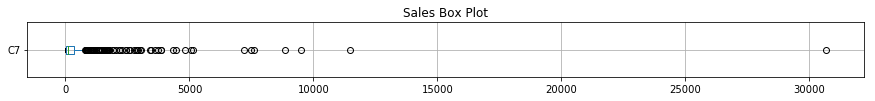

In [31]:
# in millions of dollars

compdata_cont.boxplot(column='C7',vert=False, figsize=(15,1))
plt.title('Sales Box Plot')
plt.show()

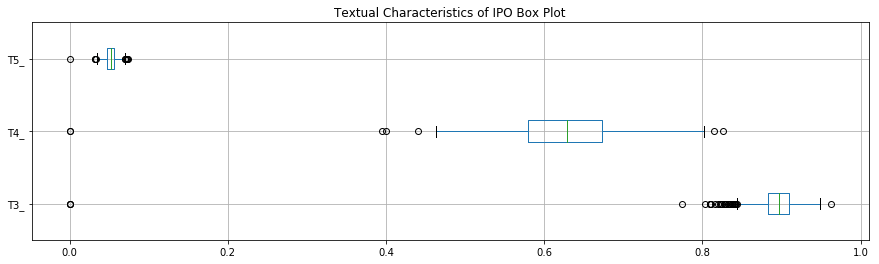

In [32]:
compdata_cont.boxplot(column=['T3_','T4_','T5_'],vert=False, figsize=(15,4))
plt.title('Textual Characteristics of IPO Box Plot')
plt.show()

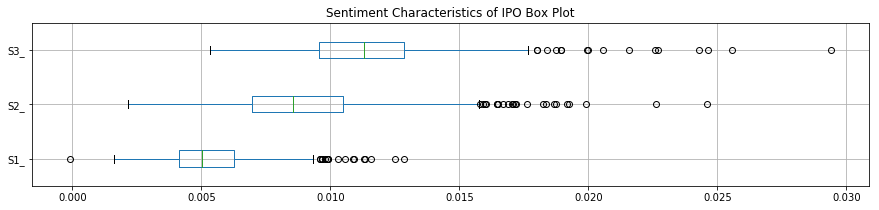

In [33]:
compdata_cont.boxplot(column=['S1_','S2_','S3_'],vert=False, figsize=(15,3))
plt.title('Sentiment Characteristics of IPO Box Plot')
plt.show()

It is obvious that there are outliers in the dataset that will offset the results. 
To remove this data we will use the interquartile range to determine the upper and lower bound limits and any data outside the limit will be converted to either the lower or upper bound number.

In [34]:
for col in compdata_cont.columns:
    u_bound = compdata_cont[col].quantile(0.75) + (1.5*(compdata_cont[col].quantile(0.75)-compdata_cont[col].quantile(0.25)))
    compdata_cont[col][compdata_cont[col] > u_bound] = u_bound

In [35]:
for col in compdata_cont.columns:
    l_bound = compdata_cont[col].quantile(0.25) - (1.5*(compdata_cont[col].quantile(0.75)-compdata_cont[col].quantile(0.25)))
    compdata_cont[col][compdata_cont[col] < l_bound] = l_bound

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
compdata_cont.head()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
0,10.0,9.5,8.5,11.8700,122.0,2.39,0.029074,40962052.0,10600000.0,51.345,...,0.054250,0.004875,0.009199,0.010929,9.0,1,3.864345,11.111111,0,1
1,8.0,10.0,8.0,7.2500,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,...,0.051395,0.003258,0.011105,0.010876,9.0,0,7.867911,0.000000,1,0
2,7.0,14.0,12.0,6.7000,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,...,0.061764,0.009436,0.006271,0.011403,13.0,0,3.369134,0.000000,1,0
3,11.5,16.0,14.0,12.3900,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,...,0.061630,0.009436,0.007144,0.013319,15.0,0,3.299697,0.000000,1,1
4,21.0,21.0,19.0,34.7375,80.0,0.07,-0.034895,30741716.0,8250000.0,632.298,...,0.048550,0.004518,0.010047,0.011261,20.0,1,3.726269,5.000000,0,1


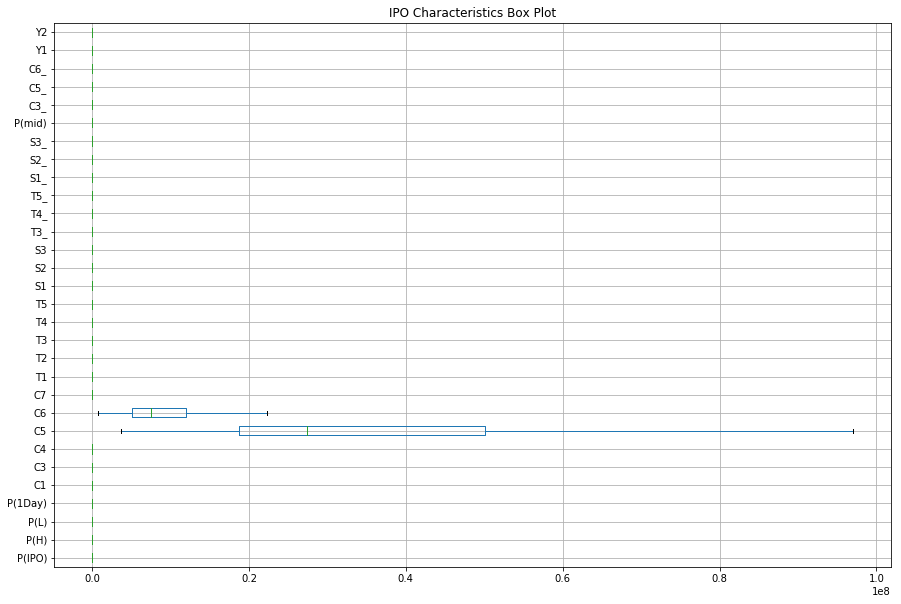

In [37]:
compdata_cont.boxplot(vert=False, figsize=(15,10))
plt.title('IPO Characteristics Box Plot')
plt.show()

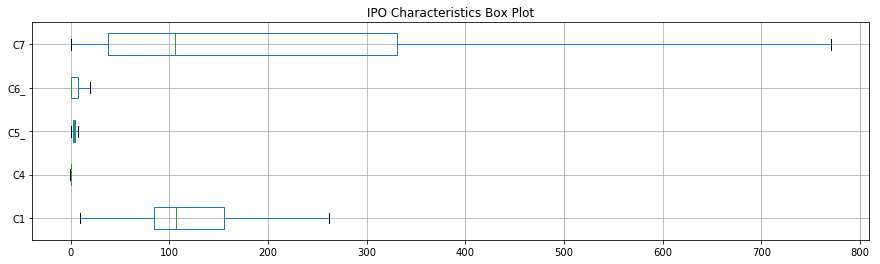

In [38]:
compdata_cont.boxplot(column=['C1','C4','C5_','C6_','C7'],vert=False, figsize=(15,4))
plt.title('IPO Characteristics Box Plot')
plt.show()

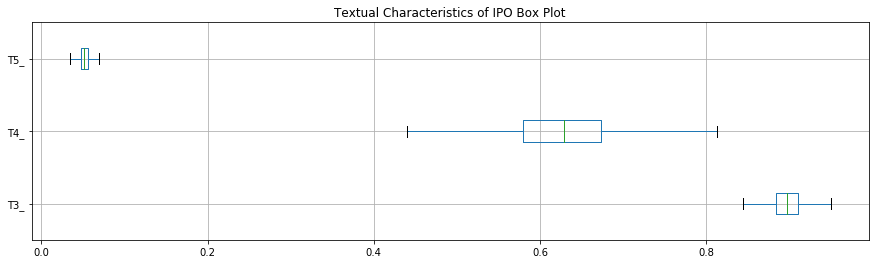

In [39]:
compdata_cont.boxplot(column=['T3_','T4_','T5_'],vert=False, figsize=(15,4))
plt.title('Textual Characteristics of IPO Box Plot')
plt.show()

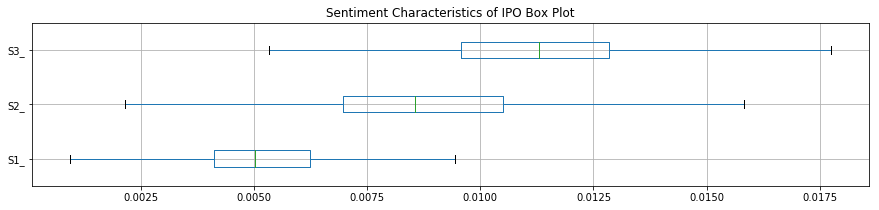

In [40]:
compdata_cont.boxplot(column=['S1_','S2_','S3_'],vert=False, figsize=(15,3))
plt.title('Sentiment Characteristics of IPO Box Plot')
plt.show()

In [41]:
# Did not need.. used a for loop instead

# Q1 = compdata['P(IPO)'].quantile(0.25)
# Q3 = compdata['P(IPO)'].quantile(0.75)
# IQR = Q3 - Q1
# LowerBound = Q1 - (1.5 * IQR)
# UpperBound = Q3 + (1.5 * IQR)

# compdata[((compdata['P(IPO)'] < LowerBound) |(compdata['P(IPO)'] > UpperBound))]

# This dataframe has rows for the IQR Upper Bound and Lower Bound numbers for each variable

# iqrdata.loc['IQR'] = (iqrdata.loc['75%']-iqrdata.loc['25%'])
# iqrdata.loc['UpperRange'] = (iqrdata.loc['75%']+(1.5*iqrdata.loc['IQR']))
# iqrdata.loc['LowerRange'] = (iqrdata.loc['25%']-(1.5*iqrdata.loc['IQR']))
# iqrdata

In [42]:
# Normalization
#... zscore

## Skewness 

In [43]:
compdata['C4'].skew()

-0.48046406342788955

In [44]:
compdata['C5'].skew()

13.581494526596854

In [45]:
compdata['C6'].skew()

12.558873800766323

In [46]:
compdata['C7'].skew()

11.705896105418113

In [47]:
compdata['T3_'].skew()

25.640745319111563

In [48]:
compdata['T4_'].skew()

0.08384912029669304

In [49]:
compdata['T5_'].skew()

26.054070233420322

In [50]:
compdata['S1_'].skew()

20.915716652483688

In [51]:
compdata['S2_'].skew()

10.504440783149562

In [52]:
compdata['S3_'].skew()

22.237728716377394

In [53]:
# must revisit these histograms.  

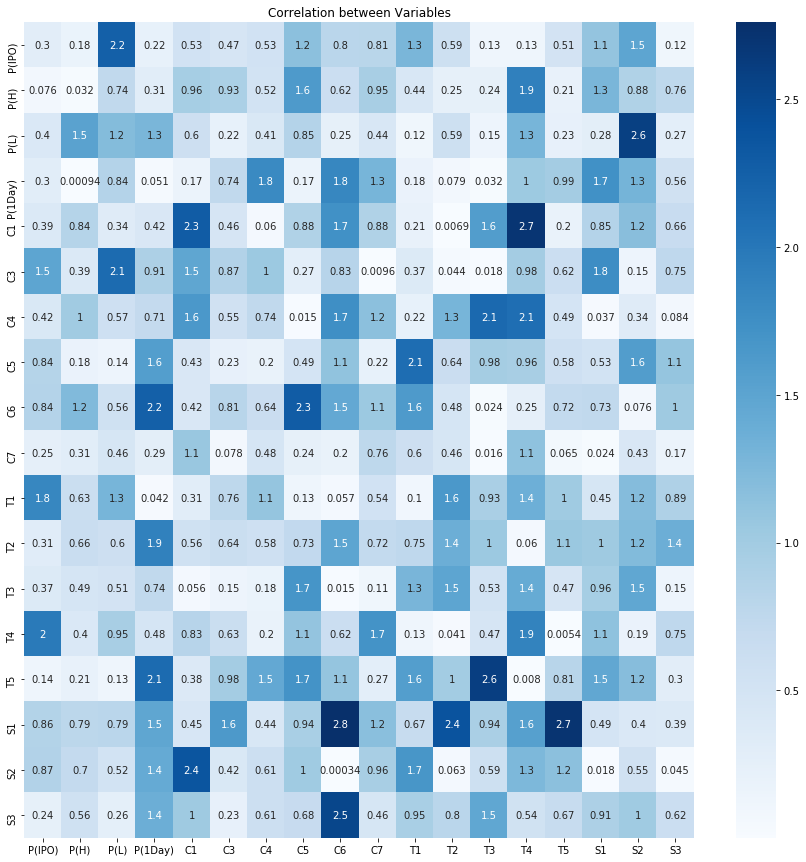

In [54]:
# Correlation between Variables

index= ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']
cols = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']
df = DataFrame(abs(np.random.randn(18,18)), index=index,  columns=cols)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df, annot=True, cbar=True, cmap='Blues')
plt.title("Correlation between Variables")
plt.show()

# Meta Data:
__Variable Identification__

- Do we need metadata?
- Will this help create the heatmap and correlations?

__**Not Finished__

data = []
for v in compdata.columns:
    # Defining the role
    if v == 'I1':
        role = 'ticker'
    elif v == 'I2':
        role = 'company_name'
    elif v == 'I3':
        role = 'standard_industry_classifier'
    else:
        role = 'input'
         
    # Defining the level
    if v == ('C2','Y1','Y2','C3'):
        level = 'binary'
    elif v == 'I2':
        role = 'company_name'
    elif v == 'I3':
        role = 'standard_industry_classifier'
    else:
        role = 'input'
    
    # Defining the data type 
    
    # Create a Dict that contains all the metadata for the variable

    
meta = pd.DataFrame(data, columns=[])
meta.set_index('varname', inplace=True)